In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.metrics import r2_score

In [2]:
golf_scores = pd.read_csv('jake_golf_scores.csv')

In [3]:
golf_scores.head()

,DateOfRound,Score,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,6/25/2020,76,36,21,18,85.714286,7,13,43,5,0,0.000000
1,6/26/2020,72,31,19,17,89.473684,11,12,41,6,3,50.000000
2,6/29/2020,70,30,20,16,80.000000,6,11,41,7,3,42.857143
3,6/30/2020,72,33,21,17,80.952381,6,13,43,5,2,40.000000
4,7/1/2020,72,32,17,16,94.117647,6,10,42,8,3,37.500000


In [4]:
golf_scores_num = golf_scores.drop(columns = 'DateOfRound')

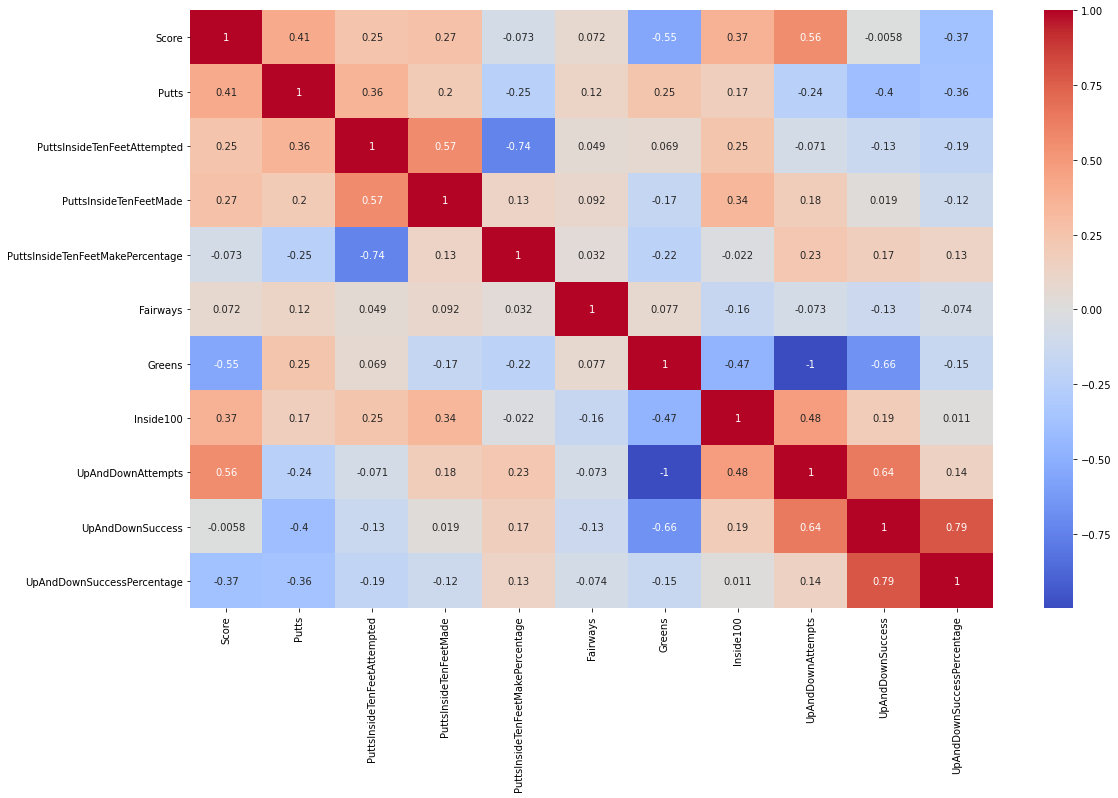

In [5]:
golf_scores_num_correlations = golf_scores_num.corr()
plt.figure(figsize = (18,11))
sns.heatmap(golf_scores_num_correlations, annot = True, cmap = "coolwarm");

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

In [7]:
base_features = ['Putts', 'PuttsInsideTenFeetAttempted', 'PuttsInsideTenFeetMade', 'PuttsInsideTenFeetMakePercentage', 'Fairways', 'Greens', 'Inside100', 'UpAndDownAttempts', 'UpAndDownSuccess', 'UpAndDownSuccessPercentage']
X = golf_scores_num[base_features]
X

,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,36,21,18,85.714286,7,13,43,5,0,0.000000
1,31,19,17,89.473684,11,12,41,6,3,50.000000
2,30,20,16,80.000000,6,11,41,7,3,42.857143
3,33,21,17,80.952381,6,13,43,5,2,40.000000
4,32,17,16,94.117647,6,10,42,8,3,37.500000
5,31,21,16,76.190476,6,12,45,6,3,50.000000
6,31,20,17,85.000000,4,10,41,8,5,62.500000
7,30,16,15,93.750000,5,7,44,11,4,36.363636
8,34,20,18,90.000000,10,11,44,7,2,28.571429
9,33,21,17,80.952381,7,12,43,6,2,33.333333


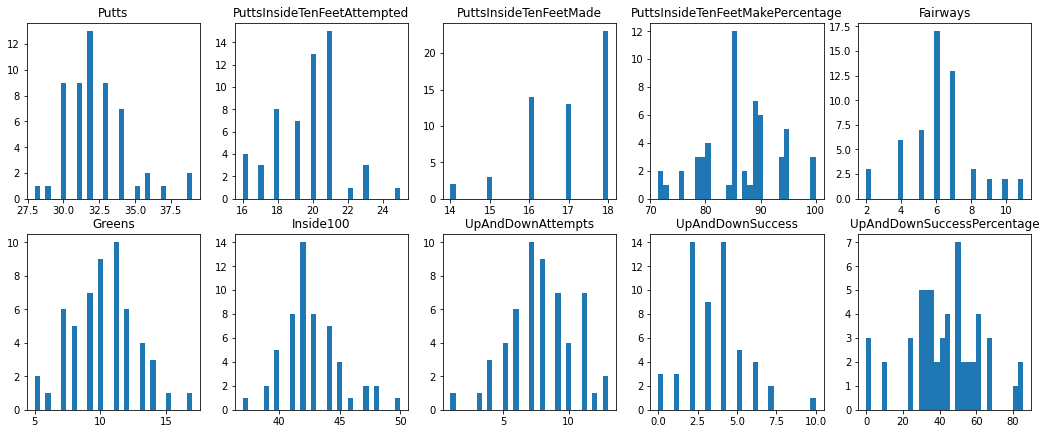

In [8]:
cols = list(X)
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)
for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(X[cols[i]], bins=30)
    plt.title(cols[i])

In [9]:
y = golf_scores_num.Score 
y.head()

0    76
1    72
2    70
3    72
4    72
Name: Score, dtype: int64

In [10]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(44, 10) (11, 10) (44,) (11,)


In [11]:
print(X.shape, y.shape)

(55, 10) (55,)


In [12]:
lr = LogisticRegression(max_iter = 2000)
lr_cv = cross_val_score(lr, X, y, cv = 8)
print(100 * lr_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * lr_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation

In [13]:
# Difference between training and test set for Logistic Regression model 
from sklearn.metrics import accuracy_score
lr.fit(train_X, train_y)
lr_train_acc = accuracy_score(y_true=train_y, y_pred=lr.predict(train_X))
lr_test_acc = accuracy_score(y_true=val_y, y_pred=lr.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * lr_train_acc))
print('Test Accuracy: %.2f%%' % (100 * lr_test_acc))
print()

Training Accuracy: 77.27%
Test Accuracy: 36.36%

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt, train_X, train_y, cv = 8)
print(100 * dt_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * dt_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
[ 0.         16.66666667  0.         50.         40.          0.
  0.          0.        ]

CV Mean: 13.33%


In [15]:
dt.fit(train_X, train_y)
dt_train_acc = accuracy_score(y_true=train_y, y_pred=dt.predict(train_X))
dt_test_acc = accuracy_score(y_true=val_y, y_pred=dt.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * dt_train_acc))
print('Test Accuracy: %.2f%%' % (100 * dt_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 36.36%



In [16]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn, train_X, train_y, cv = 8)
print(100 * knn_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * knn_cv.mean()))

[16.66666667 16.66666667  0.         16.66666667 20.         40.
 20.         20.        ]

CV Mean: 18.75%
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"


In [17]:
knn.fit(train_X, train_y)
knn_train_acc = accuracy_score(y_true=train_y, y_pred=knn.predict(train_X))
knn_test_acc = accuracy_score(y_true=val_y, y_pred=knn.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * knn_train_acc))
print('Test Accuracy: %.2f%%' % (100 * knn_test_acc))
print()

Training Accuracy: 36.36%
Test Accuracy: 18.18%



In [18]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf_cv = cross_val_score(rf, train_X, train_y, cv = 8)
print(100 * rf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * rf_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
[16.66666667 16.66666667 16.66666667 33.33333333 40.         20.
  0.         20.        ]

CV Mean: 20.42%


In [19]:
rf.fit(train_X, train_y)
rf_train_acc = accuracy_score(y_true=train_y, y_pred=rf.predict(train_X))
rf_test_acc = accuracy_score(y_true=val_y, y_pred=rf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * rf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * rf_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 36.36%



In [20]:
svc = SVC(probability = True)
svc_cv = cross_val_score(svc, train_X, train_y, cv = 8)
print(100 * svc_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * svc_cv.mean()))

[16.66666667 16.66666667 16.66666667 16.66666667 20.         20.
 20.         20.        ]

CV Mean: 18.33%
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"


In [21]:
svc.fit(train_X, train_y)
svc_train_acc = accuracy_score(y_true=train_y, y_pred=svc.predict(train_X))
svc_test_acc = accuracy_score(y_true=val_y, y_pred=svc.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * svc_train_acc))
print('Test Accuracy: %.2f%%' % (100 * svc_test_acc))
print()

Training Accuracy: 18.18%
Test Accuracy: 9.09%



In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_cv = cross_val_score(xgb, train_X, train_y, cv = 8)
print(100 * xgb_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * xgb_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[08:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 

In [23]:
xgb.fit(train_X, train_y)
xgb_train_acc = accuracy_score(y_true=train_y, y_pred=xgb.predict(train_X))
xgb_test_acc = accuracy_score(y_true=val_y, y_pred=xgb.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * xgb_train_acc))
print('Test Accuracy: %.2f%%' % (100 * xgb_test_acc))
print()

[08:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Training Accuracy: 100.00%
Test Accuracy: 36.36%



In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv = cross_val_score(reg, train_X, train_y, cv = 8, scoring = 'neg_mean_squared_error')
print(-1 * cv)
print()
print('CV Mean:' + str((-1 * cv.mean())))

[3.58109688 3.75873183 5.62275481 4.42347476 8.29991924 3.95488409
 5.65367134 7.76303633]

CV Mean:5.38219615998511


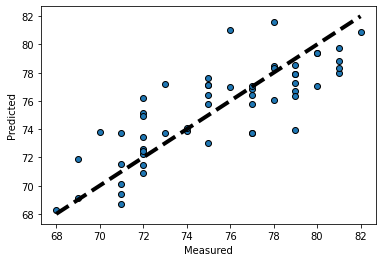

In [25]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(reg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [26]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'soft')
voting_clf_cv = cross_val_score(voting_clf, train_X, train_y, cv = 8)
print(100 * voting_clf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * voting_clf_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation

In [27]:
voting_clf.fit(train_X, train_y)
voting_clf_train_acc = accuracy_score(y_true=train_y, y_pred=voting_clf.predict(train_X))
voting_clf_test_acc = accuracy_score(y_true=val_y, y_pred=voting_clf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * voting_clf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * voting_clf_test_acc))
print()

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; an

In [28]:
# Compare all results in data frame
results_on_val_X = [lr_test_acc, dt_test_acc, rf_test_acc, knn_test_acc, xgb_test_acc, svc_test_acc, voting_clf_test_acc]
results_on_val_X = pd.DataFrame(results_on_val_X)
results_on_val_X = results_on_val_X.rename(columns = {0: 'Test Accuracy on Score'})
results_on_val_X['Test Accuracy on Score'] = 100 * results_on_val_X['Test Accuracy on Score']
results_on_val_X = results_on_val_X.rename(index = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGB Classifier', 5: 'SVC', 6: 'Voting Classifier'})
results_on_val_X['CV Accuracy on Score'] = [lr_cv.mean(), dt_cv.mean(), rf_cv.mean(), knn_cv.mean(), xgb_cv.mean(), svc_cv.mean(), voting_clf_cv.mean()]
results_on_val_X['CV Accuracy on Score'] = 100 * results_on_val_X['CV Accuracy on Score']
results_on_val_X

,Test Accuracy on Score,CV Accuracy on Score
Logistic Regression,36.363636,20.535714
Decision Tree,36.363636,13.333333
Random Forest,36.363636,20.416667
KNN,18.181818,18.750000
XGB Classifier,36.363636,17.916667
SVC,9.090909,18.333333
Voting Classifier,45.454545,15.416667


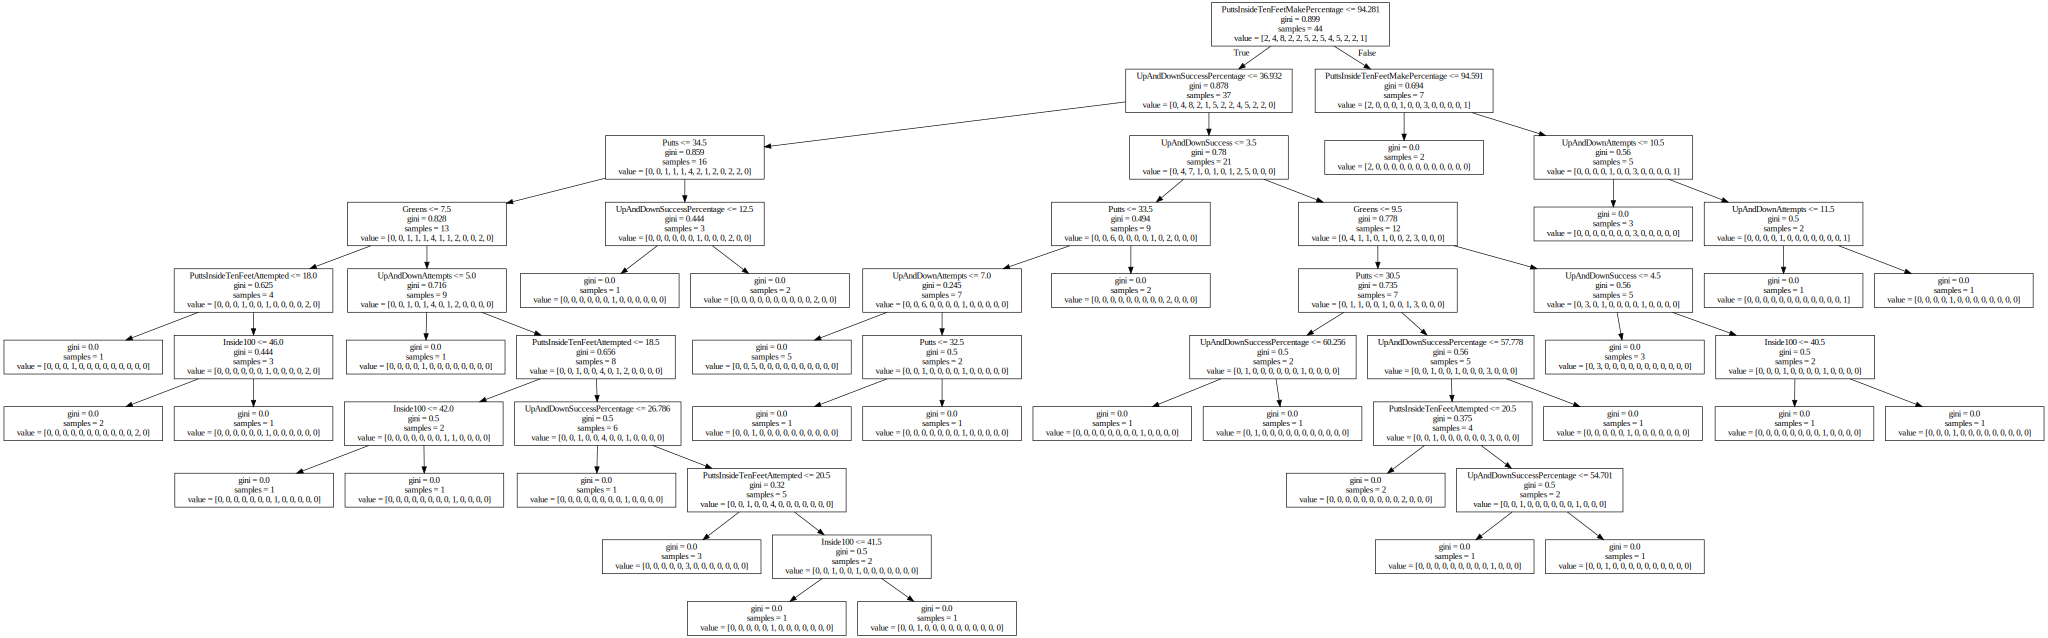

In [29]:
import graphviz

tree_graph = tree.export_graphviz(dt, out_file=None, feature_names= base_features)
graphviz.Source(tree_graph)

In [30]:
import eli5
from eli5.sklearn import PermutationImportance
lr.fit(train_X, train_y)
perm = PermutationImportance(lr, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Weight,Feature
0.2182 ± 0.1455,UpAndDownSuccessPercentage
0.1091 ± 0.0727,Putts
0.1091 ± 0.2120,PuttsInsideTenFeetMakePercentage
0.0909 ± 0.1626,Greens
0.0545 ± 0.0891,Inside100
0.0364 ± 0.1455,PuttsInsideTenFeetAttempted
0.0364 ± 0.0891,UpAndDownSuccess
0.0182 ± 0.0727,UpAndDownAttempts
0.0182 ± 0.0727,PuttsInsideTenFeetMade
0 ± 0.0000,Fairways


In [31]:
rf.fit(train_X, train_y)
perm2 = PermutationImportance(rf, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

Weight,Feature
0.1455 ± 0.2182,UpAndDownSuccessPercentage
0.1273 ± 0.0891,UpAndDownSuccess
0.0727 ± 0.1361,UpAndDownAttempts
0.0727 ± 0.1361,PuttsInsideTenFeetMakePercentage
0.0545 ± 0.0891,PuttsInsideTenFeetAttempted
0.0364 ± 0.1854,Fairways
0.0182 ± 0.0727,Inside100
0.0182 ± 0.0727,Putts
0 ± 0.0000,Greens
0 ± 0.0000,PuttsInsideTenFeetMade


In [32]:
knn.fit(train_X, train_y)
perm3 = PermutationImportance(knn, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm3, feature_names = val_X.columns.tolist())

Weight,Feature
0.1455 ± 0.0891,UpAndDownAttempts
0.1273 ± 0.0891,UpAndDownSuccessPercentage
0.0727 ± 0.0727,Greens
0.0182 ± 0.2120,PuttsInsideTenFeetMakePercentage
0.0182 ± 0.0727,Inside100
0.0182 ± 0.0727,Fairways
0.0182 ± 0.0727,PuttsInsideTenFeetMade
0.0182 ± 0.0727,Putts
0 ± 0.0000,UpAndDownSuccess
0 ± 0.0000,PuttsInsideTenFeetAttempted


In [33]:
# Fit all data
knn.fit(train_X, train_y)
reg.fit(train_X, train_y)
lr.fit(train_X, train_y)
rf.fit(train_X, train_y)
# Predict what y will be and add to data frame 
PredictedScore_Knn = knn.predict(val_X)
PredictedScore_Knn = pd.DataFrame(PredictedScore_Knn)
PredictedScore_Knn = PredictedScore_Knn.rename(columns = {0 : 'Knn PredictedScore'})
PredictedScore_reg = reg.predict(val_X)
PredictedScore_reg = pd.DataFrame(PredictedScore_reg)
PredictedScore_reg = PredictedScore_reg.rename(columns = {0 : 'Linear Regression PredictedScore'})
PredictedScore_lr = lr.predict(val_X)
PredictedScore_lr = pd.DataFrame(PredictedScore_lr)
PredictedScore_lr = PredictedScore_lr.rename(columns = {0 : 'Logistic Regression PredictedScore'})
PredictedScore_rf = rf.predict(val_X)
PredictedScore_rf = pd.DataFrame(PredictedScore_rf)
PredictedScore_rf = PredictedScore_rf.rename(columns = {0 : 'Random Forest PredictedScore'})
# Concat all predicted scores to data frame 
PredictedScore = [PredictedScore_Knn, PredictedScore_lr, PredictedScore_reg, PredictedScore_rf]
PredictedScore = pd.concat(PredictedScore, axis = 1)
# Concat predicted scores with data used to predict it 
Predict_X = pd.DataFrame(val_X)
Predict_X = Predict_X.reset_index(drop = True)
Predicition = [Predict_X, PredictedScore]
PredictedScoreWithStats = pd.concat(Predicition, axis = 1)
# Concat predicted scores with actual scorres to compare
Actual_Score = pd.DataFrame(val_y)
Actual_Score = Actual_Score.reset_index(drop = True)
Actual_Score = Actual_Score.rename(columns = {0: 'Actual Score'})
Prediction_With_Actual = [PredictedScoreWithStats, Actual_Score]
Prediction_With_Actual = pd.concat(Prediction_With_Actual, axis = 1)
# Move to csv file 
#Prediction_With_Actual.to_csv('Prediction_With_Actual_All_Models.csv')


C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1. feature 9 (0.127148)
2. feature 0 (0.122466)
3. feature 6 (0.115661)
4. feature 5 (0.106185)
5. feature 7 (0.099172)
6. feature 8 (0.097705)
7. feature 4 (0.097270)
8. feature 3 (0.093585)
9. feature 1 (0.077181)
10. feature 2 (0.063627)


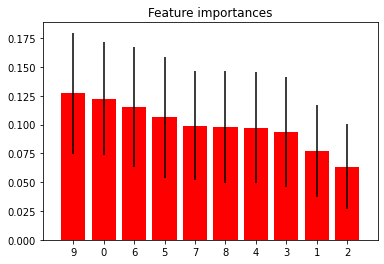

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_X, train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [35]:
base_features = pd.DataFrame(base_features)
base_features

,0
0,Putts
1,PuttsInsideTenFeetAttempted
2,PuttsInsideTenFeetMade
3,PuttsInsideTenFeetMakePercentage
4,Fairways
5,Greens
6,Inside100
7,UpAndDownAttempts
8,UpAndDownSuccess
9,UpAndDownSuccessPercentage


In [36]:
# Defining percentage functions 
def putts_inside_of_ten(PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade):
    ten_feet_percentage = (100 * (PuttsInsideTenFeetMade / PuttsInsideTenFeetAttempted))
    return ten_feet_percentage

def up_and_down(UpAndDownAttempts, UpAndDownSuccess):
    up_and_down_percentage = (100 * (UpAndDownSuccess / UpAndDownAttempts))
    return up_and_down_percentage

In [37]:
# Input of round
def round(Putts, PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade, Fairways, Greens, Inside100, UpAndDownAttempts, UpAndDownSuccess):
    PuttsInsideTenFeetMakePercentage = putts_inside_of_ten(PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade)
    UpAndDownSuccessPercentage = up_and_down(UpAndDownAttempts, UpAndDownSuccess)
    return np.array([Putts, PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade, PuttsInsideTenFeetMakePercentage, Fairways, Greens, Inside100, UpAndDownAttempts, UpAndDownSuccess, UpAndDownSuccessPercentage]).reshape(1,-1)


In [38]:
golf_round = round(31, 19, 18, 4, 12, 41, 6, 3)
golf_round
prediction = rf.predict(golf_round)
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns = {0: 'Predicted Score'})
prediction

,Predicted Score
0,72


In [39]:
# Create new data frame for comparison to average
golf_scores_with_average = golf_scores.copy()
golf_scores_with_average['AverageScore'] = golf_scores_with_average.Score.mean()
golf_scores_with_average['AboveOrBelowAverage'] = golf_scores_with_average.Score > golf_scores_with_average.AverageScore

In [40]:
# Above or below average column changed to when above average = 1 and below average = 0
golf_scores_with_average['AboveOrBelowAverage'] = golf_scores_with_average['AboveOrBelowAverage'].astype(int)
golf_scores_with_average_num = golf_scores_with_average.drop(columns = ['DateOfRound'])
golf_scores_with_average_num

,Score,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage,AverageScore,AboveOrBelowAverage
0,76,36,21,18,85.714286,7,13,43,5,0,0.000000,75.418182,1
1,72,31,19,17,89.473684,11,12,41,6,3,50.000000,75.418182,0
2,70,30,20,16,80.000000,6,11,41,7,3,42.857143,75.418182,0
3,72,33,21,17,80.952381,6,13,43,5,2,40.000000,75.418182,0
4,72,32,17,16,94.117647,6,10,42,8,3,37.500000,75.418182,0
5,72,31,21,16,76.190476,6,12,45,6,3,50.000000,75.418182,0
6,73,31,20,17,85.000000,4,10,41,8,5,62.500000,75.418182,0
7,73,30,16,15,93.750000,5,7,44,11,4,36.363636,75.418182,0
8,75,34,20,18,90.000000,10,11,44,7,2,28.571429,75.418182,0
9,72,33,21,17,80.952381,7,12,43,6,2,33.333333,75.418182,0


In [41]:
base_features2 = ['Putts', 'PuttsInsideTenFeetAttempted', 'PuttsInsideTenFeetMade', 'PuttsInsideTenFeetMakePercentage', 'Fairways', 'Greens', 'Inside100', 'UpAndDownAttempts', 'UpAndDownSuccess', 'UpAndDownSuccessPercentage']
X = golf_scores_with_average_num[base_features2]
X

,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,36,21,18,85.714286,7,13,43,5,0,0.000000
1,31,19,17,89.473684,11,12,41,6,3,50.000000
2,30,20,16,80.000000,6,11,41,7,3,42.857143
3,33,21,17,80.952381,6,13,43,5,2,40.000000
4,32,17,16,94.117647,6,10,42,8,3,37.500000
5,31,21,16,76.190476,6,12,45,6,3,50.000000
6,31,20,17,85.000000,4,10,41,8,5,62.500000
7,30,16,15,93.750000,5,7,44,11,4,36.363636
8,34,20,18,90.000000,10,11,44,7,2,28.571429
9,33,21,17,80.952381,7,12,43,6,2,33.333333


In [42]:
y = golf_scores_with_average_num.AboveOrBelowAverage
y.head()

0    1
1    0
2    0
3    0
4    0
Name: AboveOrBelowAverage, dtype: int32

In [43]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(44, 10) (11, 10) (44,) (11,)


In [44]:
print(X.shape, y.shape)

(55, 10) (55,)


In [45]:
lr = LogisticRegression(max_iter = 2000)
lr_cv = cross_val_score(lr, train_X, train_y, cv = 8)
print(100 * lr_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * lr_cv.mean()))

[ 83.33333333  66.66666667  66.66666667 100.          60.
  80.         100.          40.        ]

CV Mean: 74.58%


In [46]:
lr.fit(train_X, train_y)
lr_train_acc = accuracy_score(y_true=train_y, y_pred=lr.predict(train_X))
lr_test_acc = accuracy_score(y_true=val_y, y_pred=lr.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * lr_train_acc))
print('Test Accuracy: %.2f%%' % (100 * lr_test_acc))
print()

Training Accuracy: 84.09%
Test Accuracy: 90.91%



In [47]:
lr.fit(train_X, train_y)
perm = PermutationImportance(lr, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1818 ± 0.1150,UpAndDownAttempts
0.1273 ± 0.1455,Putts
0.1273 ± 0.0891,Greens
0.0182 ± 0.0727,Fairways
0 ± 0.0000,UpAndDownSuccess
0 ± 0.0000,Inside100
0 ± 0.0000,PuttsInsideTenFeetMakePercentage
0 ± 0.0000,PuttsInsideTenFeetMade
0 ± 0.0000,PuttsInsideTenFeetAttempted
-0.0182 ± 0.0727,UpAndDownSuccessPercentage


In [48]:
importances = pd.DataFrame(abs(lr.coef_))
importances = importances.transpose()
importances = importances.rename(index = {0 : 'Putts', 1: 'PuttsInsideTenFeetAttempted', 2: 'PuttsInsideTenFeetMade', 3:'PuttsInsideTenFeetMakePercentage' ,4: 'Fairways' , 5: 'Greens' , 6: 'Inside100'  ,7: 'UpAndDownAttempts' ,8: 'UpAndDownSuccess' , 9: 'UpAndDownSuccessPercentage' })
importances = importances.rename(columns = {0: 'Weights'})
importances


,Weights
Putts,0.796509
PuttsInsideTenFeetAttempted,0.080011
PuttsInsideTenFeetMade,0.170300
PuttsInsideTenFeetMakePercentage,0.005983
Fairways,0.053294
Greens,0.527516
Inside100,0.257449
UpAndDownAttempts,0.546590
UpAndDownSuccess,0.284192
UpAndDownSuccessPercentage,0.038012


In [49]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt, train_X, train_y, cv = 8)
print(100 * dt_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * dt_cv.mean()))

[ 66.66666667  83.33333333 100.          66.66666667  60.
  80.         100.          60.        ]

CV Mean: 77.08%


In [50]:
dt.fit(train_X, train_y)
dt_train_acc = accuracy_score(y_true=train_y, y_pred=dt.predict(train_X))
dt_test_acc = accuracy_score(y_true=val_y, y_pred=dt.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * dt_train_acc))
print('Test Accuracy: %.2f%%' % (100 * dt_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 81.82%



In [51]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn, train_X, train_y, cv = 8)
print(100 * knn_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * knn_cv.mean()))

[33.33333333 50.         50.         50.         40.         60.
 60.         60.        ]

CV Mean: 50.42%


In [52]:
knn.fit(train_X, train_y)
knn_train_acc = accuracy_score(y_true=train_y, y_pred=knn.predict(train_X))
knn_test_acc = accuracy_score(y_true=val_y, y_pred=knn.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * knn_train_acc))
print('Test Accuracy: %.2f%%' % (100 * knn_test_acc))
print()

Training Accuracy: 68.18%
Test Accuracy: 72.73%



In [53]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf_cv = cross_val_score(rf, train_X, train_y, cv = 8)
print(100 * rf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * rf_cv.mean()))

[ 66.66666667  83.33333333  83.33333333  66.66666667  60.
  60.         100.          60.        ]

CV Mean: 72.50%


In [54]:
rf.fit(train_X, train_y)
rf_train_acc = accuracy_score(y_true=train_y, y_pred=rf.predict(train_X))
rf_test_acc = accuracy_score(y_true=val_y, y_pred=rf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * rf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * rf_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 90.91%



In [55]:
svc = SVC(probability = True)
svc_cv = cross_val_score(svc, train_X, train_y, cv = 8)
print(100 * svc_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * svc_cv.mean()))

[66.66666667 50.         50.         50.         40.         80.
 80.         40.        ]

CV Mean: 57.08%


In [56]:
svc.fit(train_X, train_y)
svc_train_acc = accuracy_score(y_true=train_y, y_pred=svc.predict(train_X))
svc_test_acc = accuracy_score(y_true=val_y, y_pred=svc.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * svc_train_acc))
print('Test Accuracy: %.2f%%' % (100 * svc_test_acc))
print()

Training Accuracy: 61.36%
Test Accuracy: 63.64%



In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_cv = cross_val_score(xgb, train_X, train_y, cv = 8)
print(100 * xgb_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * xgb_cv.mean()))

[08:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\

In [58]:
xgb.fit(train_X, train_y)
xgb_train_acc = accuracy_score(y_true=train_y, y_pred=xgb.predict(train_X))
xgb_test_acc = accuracy_score(y_true=val_y, y_pred=xgb.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * xgb_train_acc))
print('Test Accuracy: %.2f%%' % (100 * xgb_test_acc))
print()

[08:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.00%
Test Accuracy: 100.00%

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [59]:
xgb.fit(train_X, train_y)
perm2 = PermutationImportance(xgb, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[08:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Weight,Feature
0.3273 ± 0.0891,Greens
0.1636 ± 0.1361,Putts
0.0545 ± 0.0891,Fairways
0.0364 ± 0.0891,UpAndDownSuccessPercentage
0.0182 ± 0.0727,PuttsInsideTenFeetAttempted
0 ± 0.0000,UpAndDownSuccess
0 ± 0.0000,UpAndDownAttempts
0 ± 0.0000,Inside100
0 ± 0.0000,PuttsInsideTenFeetMakePercentage
0 ± 0.0000,PuttsInsideTenFeetMade


In [60]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'hard')
voting_clf_cv = cross_val_score(voting_clf, train_X, train_y, cv = 8)
print(100 * voting_clf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * voting_clf_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[08:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\

In [61]:
voting_clf.fit(train_X, train_y)
voting_clf_train_acc = accuracy_score(y_true=train_y, y_pred=voting_clf.predict(train_X))
voting_clf_test_acc = accuracy_score(y_true=val_y, y_pred=voting_clf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * voting_clf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * voting_clf_test_acc))
print()

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[08:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 93.18%
Test Accuracy: 90.91%



In [62]:
# Compare all results in data frame
below_or_above_average_on_val_X = [lr_test_acc, dt_test_acc, rf_test_acc, knn_test_acc, xgb_test_acc, svc_test_acc, voting_clf_test_acc]
below_or_above_average_on_val_X = pd.DataFrame(below_or_above_average_on_val_X)
below_or_above_average_on_val_X = below_or_above_average_on_val_X.rename(columns = {0: 'Test Accuracy for Average'})
below_or_above_average_on_val_X['Test Accuracy for Average'] = 100 * below_or_above_average_on_val_X['Test Accuracy for Average']
below_or_above_average_on_val_X = below_or_above_average_on_val_X.rename(index = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGB Classifier', 5: 'SVC', 6: 'Voting Classifier'})
below_or_above_average_on_val_X['CV Accuracy for Average'] = [lr_cv.mean(), dt_cv.mean(), rf_cv.mean(), knn_cv.mean(), xgb_cv.mean(), svc_cv.mean(), voting_clf_cv.mean()]
below_or_above_average_on_val_X['CV Accuracy for Average'] = 100 * below_or_above_average_on_val_X['CV Accuracy for Average']
comparison = [results_on_val_X, below_or_above_average_on_val_X]
comparison = pd.concat(comparison, axis = 1)
comparison

,Test Accuracy on Score,CV Accuracy on Score,Test Accuracy for Average,CV Accuracy for Average
Logistic Regression,36.363636,20.535714,90.909091,74.583333
Decision Tree,36.363636,13.333333,81.818182,77.083333
Random Forest,36.363636,20.416667,90.909091,72.500000
KNN,18.181818,18.750000,72.727273,50.416667
XGB Classifier,36.363636,17.916667,100.000000,72.916667
SVC,9.090909,18.333333,63.636364,57.083333
Voting Classifier,45.454545,15.416667,90.909091,75.000000


In [63]:
import pickle
with open("model.golf", 'wb') as f_out:
    pickle.dump(lr, f_out)
    f_out.close()

1. feature 0 (0.155457)
2. feature 7 (0.128016)
3. feature 5 (0.125200)
4. feature 4 (0.120932)
5. feature 9 (0.107229)
6. feature 6 (0.094884)
7. feature 1 (0.075714)
8. feature 3 (0.068639)
9. feature 8 (0.066337)
10. feature 2 (0.057591)


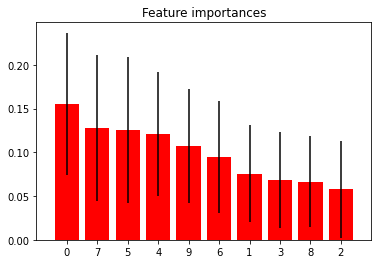

In [64]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_X, train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [65]:
base_features2 = pd.DataFrame(base_features2)
base_features2

,0
0,Putts
1,PuttsInsideTenFeetAttempted
2,PuttsInsideTenFeetMade
3,PuttsInsideTenFeetMakePercentage
4,Fairways
5,Greens
6,Inside100
7,UpAndDownAttempts
8,UpAndDownSuccess
9,UpAndDownSuccessPercentage


In [66]:

forest_cv = cross_val_score(forest, train_X, train_y, cv = 8)
print(100 * forest_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * forest_cv.mean()))

[ 66.66666667  83.33333333  83.33333333  66.66666667  60.
  80.         100.          60.        ]

CV Mean: 75.00%


In [67]:
forest.fit(train_X, train_y)
forest_train_acc = accuracy_score(y_true=train_y, y_pred=forest.predict(train_X))
forest_test_acc = accuracy_score(y_true=val_y, y_pred=forest.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * forest_train_acc))
print('Test Accuracy: %.2f%%' % (100 * forest_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 81.82%

